In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [198]:
country_df = pd.read_csv("Country-data.csv")
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [199]:
country_df.shape

(167, 10)

In [200]:
country_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [201]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [202]:
#Checking for null values if any
country_df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [203]:
#Converting exports,imports,health from percentages to absolute
country_df['exports'] = country_df['exports']*country_df['gdpp']/100
country_df['health'] = country_df['health']*country_df['gdpp']/100
country_df['imports'] = country_df['imports']*country_df['gdpp']/100

In [204]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


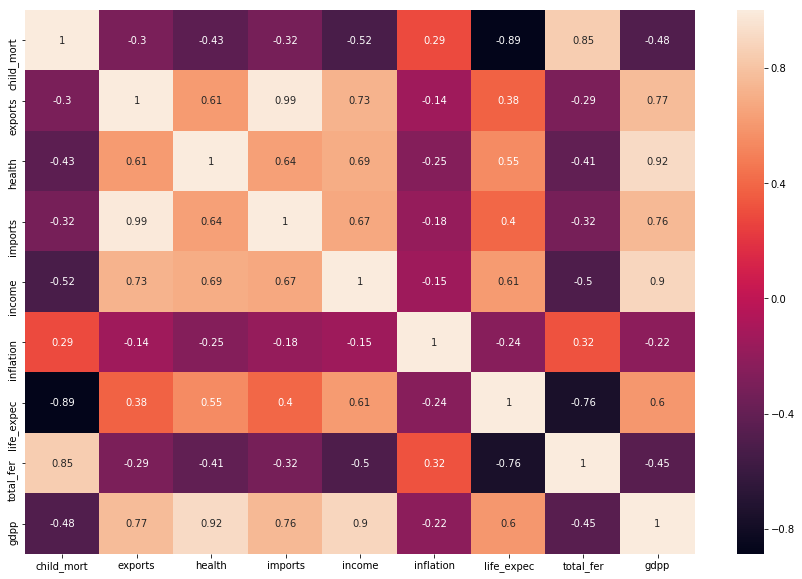

In [205]:
#heatmap to check for highly corelated values
plt.figure(figsize=(15,10))
sns.heatmap(country_df.corr(),annot=True)

As per the above heatmap, there are highly corelated values hence we can use PCA for dimensionality reduction

In [206]:
#Dropping country column

country_df1 = country_df.pop('country')

In [207]:
country_df1.head()

0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
Name: country, dtype: object

In [208]:
#Re-scaling all the columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(country_df)
data

C:\Users\mutnoory_souravi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\mutnoory_souravi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [209]:
#Performing PCA

from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized' , random_state = 42)

In [210]:
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [211]:
#Components from PCA
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [212]:
#explained variance ratio of each component
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

In [213]:
#Making a scree plot for explained variance ratio
var_cumu = np.cumsum(pca.explained_variance_ratio_)

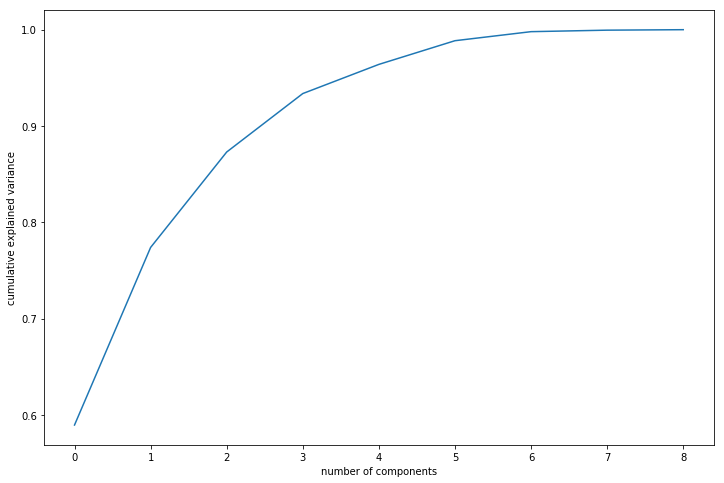

In [214]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


As per the above graph, 90% of the data is explained by the 1st 4 components

In [215]:
#Performing PCA with 4 components
from sklearn.decomposition import IncrementalPCA

In [216]:
pca_final = IncrementalPCA(n_components=4)

In [217]:
pca_final1 = pca_final.fit_transform(data)

In [218]:
pca_final1.shape

(167, 4)

In [219]:
corrmat = np.corrcoef(pca_final1.transpose())

In [220]:
corrmat.shape

(4, 4)

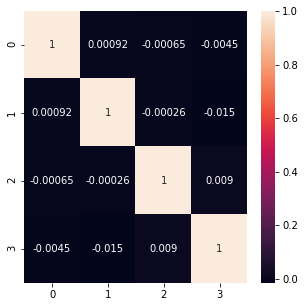

In [221]:
#Plotting the heatmap of corelation matrix
plt.figure(figsize=[5,5])
sns.heatmap(corrmat, annot=True)

In [222]:
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.008959421276881619 , min corr:  -0.015302266510759182


As we can see all the corelations are nearing 0

In [223]:
pc = np.transpose(pca_final1)

In [224]:

#Let's create the newer matrix according to the given principal components
rownames = list(country_df1)
df_final = pd.DataFrame({'country':rownames,'PC1':pc[0],'PC2':pc[1],'PC3':pc[2],'PC4':pc[3]})
df_final.head()

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.636647,1.472085,-0.546500,0.237267
1,Albania,-0.023845,-1.435816,-0.009080,-0.442921
2,Algeria,-0.459260,-0.678794,0.967852,-0.176389
3,Angola,-2.723581,2.176018,0.597794,0.438919
4,Antigua and Barbuda,0.648777,-1.026498,-0.244170,-0.267513


Hopkins Statistic

In [225]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [226]:
hopkins(df_final.drop(['country'],axis=1))

0.8641958934321923

As the hopkins value is high we can perform clustering

In [227]:
df_final1 = pd.concat([country_df1,df_final],axis=1)

In [228]:
df_final1.head()

,country,country,PC1,PC2,PC3,PC4
0,Afghanistan,Afghanistan,-2.636647,1.472085,-0.546500,0.237267
1,Albania,Albania,-0.023845,-1.435816,-0.009080,-0.442921
2,Algeria,Algeria,-0.459260,-0.678794,0.967852,-0.176389
3,Angola,Angola,-2.723581,2.176018,0.597794,0.438919
4,Antigua and Barbuda,Antigua and Barbuda,0.648777,-1.026498,-0.244170,-0.267513


In [229]:
colnames = list(country_df.columns)
pcs_df = pd.DataFrame({ 'Feature':colnames,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],'PC4':pca.components_[3]})
pcs_df

,Feature,PC1,PC2,PC3,PC4
0,child_mort,-0.316392,0.476267,-0.150012,-0.148052
1,exports,0.342887,0.397311,-0.030574,0.449425
2,health,0.358535,0.155053,-0.075703,-0.599712
3,imports,0.344865,0.370781,-0.072174,0.461798
4,income,0.380041,0.128384,0.145764,-0.154806
5,inflation,-0.143085,0.221261,0.948419,-0.007628
6,life_expec,0.343857,-0.369820,0.196752,-0.018395
7,total_fer,-0.302842,0.459715,-0.077834,-0.213928
8,gdpp,0.399988,0.200624,0.010339,-0.364772


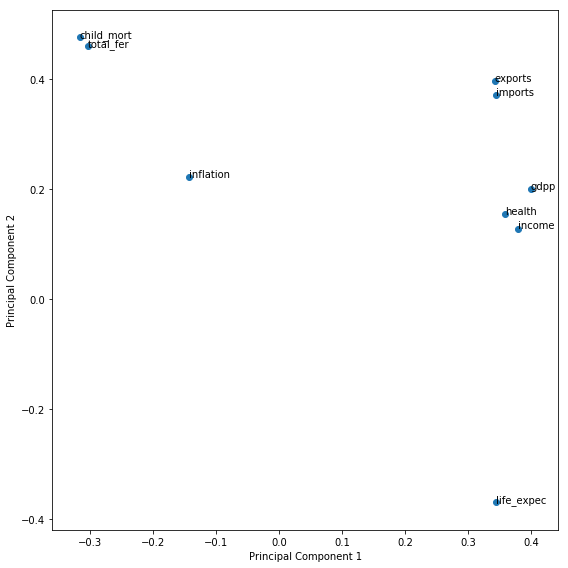

In [230]:
#Let's visualise the first 2 components
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()


child mortality and total fertility are well explained by PC2
Remaining are well explained by PC1

In [231]:
df_final.head()

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.636647,1.472085,-0.546500,0.237267
1,Albania,-0.023845,-1.435816,-0.009080,-0.442921
2,Algeria,-0.459260,-0.678794,0.967852,-0.176389
3,Angola,-2.723581,2.176018,0.597794,0.438919
4,Antigua and Barbuda,0.648777,-1.026498,-0.244170,-0.267513


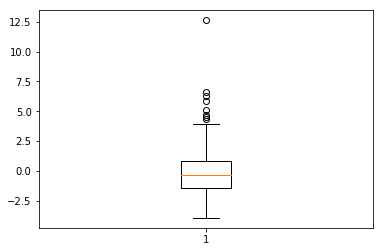

In [232]:
#lets perform outlier Analysis
#PC1
plt.boxplot(df_final.PC1)
Q1 = df_final.PC1.quantile(0.05)
Q3 = df_final.PC1.quantile(0.95)
IQR = Q3 - Q1
df_final = df_final[(df_final.PC1 >= Q1) & (df_final.PC1 <= Q3)]

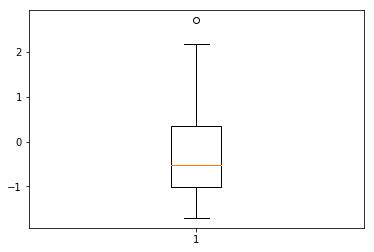

In [233]:
#PC2
plt.boxplot(df_final.PC2)
Q1 = df_final.PC2.quantile(0.05)
Q3 = df_final.PC2.quantile(0.95)
IQR = Q3 - Q1
df_final = df_final[(df_final.PC2 >= Q1) & (df_final.PC2 <= Q3)]

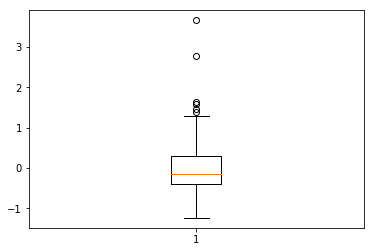

In [234]:
#PC3
plt.boxplot(df_final.PC3)
Q1 = df_final.PC3.quantile(0.05)
Q3 = df_final.PC3.quantile(0.95)
IQR = Q3 - Q1
df_final = df_final[(df_final.PC3 >= Q1) & (df_final.PC3 <= Q3)]

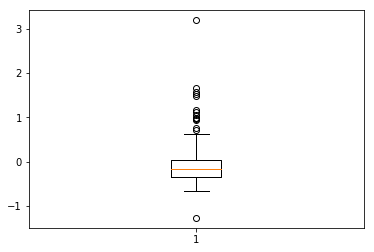

In [235]:
#PC4
plt.boxplot(df_final.PC4)
Q1 = df_final.PC4.quantile(0.05)
Q3 = df_final.PC4.quantile(0.95)
IQR = Q3 - Q1
df_final = df_final[(df_final.PC4 >= Q1) & (df_final.PC4 <= Q3)]

In [236]:
df_final.shape

(107, 5)

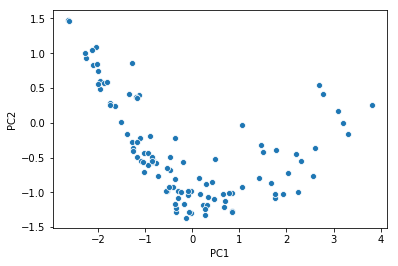

In [237]:
sns.scatterplot(x = 'PC1', y = 'PC2',data = df_final)

Lets calculate hopikins satistic after removing outliers

In [238]:
df_final = df_final.drop(['country'],axis=1)

In [239]:
hopkins(df_final)

0.7958032397428785

The value is above 0.5 hence our data is good for clustering

In [240]:
df_km = scaler.fit_transform(df_final)

#### Clustering

In [241]:
#Calculating the shilloute score to see how many clusters can be formed
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(df_km)
    sse_.append([k, silhouette_score(df_km, kmeans.labels_)])

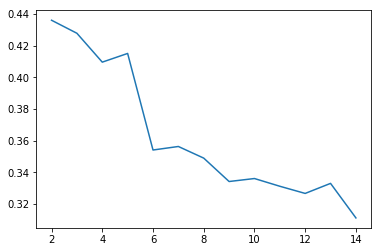

In [242]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

As per the above graph we can take the value of k=5

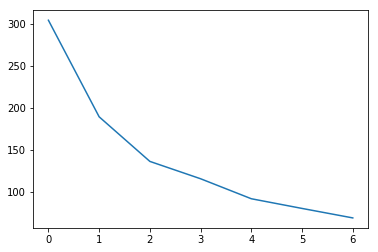

In [243]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_km)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [244]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_km)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_km, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.43594693788323513
For n_clusters=3, the silhouette score is 0.4277356281071582
For n_clusters=4, the silhouette score is 0.40953078256736025
For n_clusters=5, the silhouette score is 0.4150159351461418
For n_clusters=6, the silhouette score is 0.3541203445170194
For n_clusters=7, the silhouette score is 0.33899153645684543
For n_clusters=8, the silhouette score is 0.34665026227602935


In [245]:
#k-means with n=5
kmeans = KMeans(n_clusters=5,max_iter=50,random_state = 50)
kmeans.fit(df_km)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [246]:
kmeans.labels_

array([0, 2, 4, 4, 1, 2, 1, 2, 4, 4, 2, 4, 4, 4, 0, 4, 4, 4, 4, 2, 4, 4,
       0, 3, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 1, 3, 0, 4, 1, 3, 1, 4, 4, 4,
       1, 4, 2, 2, 3, 1, 1, 4, 4, 2, 0, 2, 4, 0, 4, 0, 2, 4, 0, 4, 4, 3,
       4, 0, 4, 4, 0, 2, 1, 2, 0, 4, 4, 4, 4, 4, 1, 4, 2, 0, 4, 4, 4, 0,
       0, 4, 1, 4, 3, 4, 2, 0, 4, 4, 4, 0, 0, 2, 1, 4, 2, 0, 3])

In [247]:
df_final3 = pd.concat([country_df1,df_final],axis=1)
df_final3.head()

,country,PC1,PC2,PC3,PC4
0,Afghanistan,-2.636647,1.472085,-0.546500,0.237267
1,Albania,NaN,NaN,NaN,NaN
2,Algeria,-0.459260,-0.678794,0.967852,-0.176389
3,Angola,NaN,NaN,NaN,NaN
4,Antigua and Barbuda,0.648777,-1.026498,-0.244170,-0.267513


In [248]:
df_km1 = df_final
df_km1.index = pd.RangeIndex(len(df_km1.index))
country_km = pd.concat([df_km1, pd.Series(kmeans.labels_)], axis=1)
country_km.columns = ['PC1', 'PC2','PC3','PC4','ClusterID']
country_km.head()

,PC1,PC2,PC3,PC4,ClusterID
0,-2.636647,1.472085,-0.546500,0.237267,0
1,-0.459260,-0.678794,0.967852,-0.176389,2
2,0.648777,-1.026498,-0.244170,-0.267513,4
3,-0.334274,-1.279033,0.190772,-0.501435,4
4,3.818137,0.262614,-0.297336,0.974405,1


In [249]:
country_km['ClusterID'].value_counts()

4    53
0    19
2    16
1    12
3     7
Name: ClusterID, dtype: int64

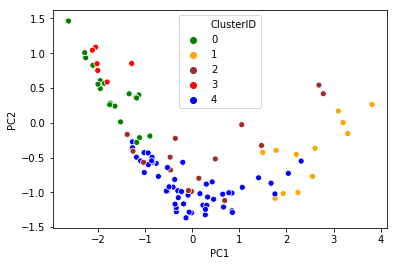

In [250]:
#Scatter plot between PC components and cluster ID
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',data=country_km,palette=['green','orange','brown','red','blue'])

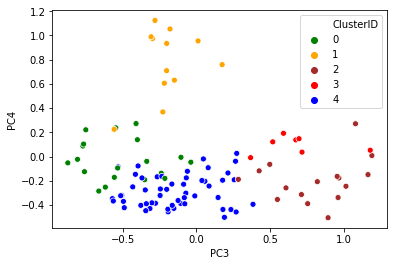

In [251]:
sns.scatterplot(x='PC3',y='PC4',hue='ClusterID',data=country_km,palette=['green','orange','brown','red','blue'])

In [252]:
#Merging the pricipal components with the actual variables
country_merge1 = pd.merge(country_df1,country_km,left_index=True,right_index=True)

In [253]:
country_merge1.head()

,country,PC1,PC2,PC3,PC4,ClusterID
0,Afghanistan,-2.636647,1.472085,-0.546500,0.237267,0
1,Albania,-0.459260,-0.678794,0.967852,-0.176389,2
2,Algeria,0.648777,-1.026498,-0.244170,-0.267513,4
3,Angola,-0.334274,-1.279033,0.190772,-0.501435,4
4,Antigua and Barbuda,3.818137,0.262614,-0.297336,0.974405,1


In [254]:
country_merge = pd.merge(country_merge1,country_df,left_index=True,right_index=True)

In [255]:
country_merge.head()

,country,PC1,PC2,PC3,PC4,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,-2.636647,1.472085,-0.546500,0.237267,0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,-0.459260,-0.678794,0.967852,-0.176389,2,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,0.648777,-1.026498,-0.244170,-0.267513,4,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,-0.334274,-1.279033,0.190772,-0.501435,4,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,3.818137,0.262614,-0.297336,0.974405,1,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [256]:
country_merge.shape

(107, 15)

#### Analysing the clusters

In [257]:
country_analysis = country_merge.drop(['PC1','PC2','PC3','PC4'],axis=1)

In [258]:
country_analysis.head()

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,2,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,4,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,4,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,1,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [259]:
gdpp_mean = pd.DataFrame(country_analysis.groupby(["ClusterID"]).gdpp.mean())
child_mort_mean = pd.DataFrame(country_analysis.groupby(["ClusterID"]).child_mort.mean())
income_mean = pd.DataFrame(country_analysis.groupby(["ClusterID"]).income.mean())

In [260]:
country_analysis_df = pd.concat([pd.Series([0,1,2,3,4]),child_mort_mean,income_mean,gdpp_mean], axis=1)

In [261]:
country_analysis_df

,0,child_mort,income,gdpp
0,0,47.357895,10577.263158,7209.736842
1,1,42.641667,13543.333333,9884.916667
2,2,24.543750,22382.500000,18069.312500
3,3,29.642857,18565.428571,8677.000000
4,4,44.100000,16097.603774,12974.320755


In [262]:
country_analysis_df.columns = ["ClusterID","child_mort_mean","income_mean","gdpp_mean"]

In [263]:
country_analysis_df

,ClusterID,child_mort_mean,income_mean,gdpp_mean
0,0,47.357895,10577.263158,7209.736842
1,1,42.641667,13543.333333,9884.916667
2,2,24.543750,22382.500000,18069.312500
3,3,29.642857,18565.428571,8677.000000
4,4,44.100000,16097.603774,12974.320755


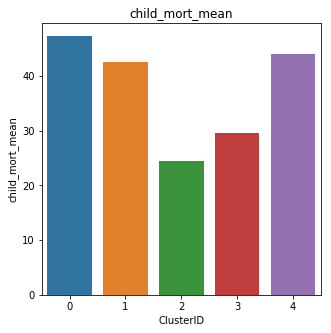

In [264]:
plt.figure(figsize=(5,5))
plt.title("child_mort_mean")
sns.barplot(country_analysis_df.ClusterID,country_analysis_df.child_mort_mean)

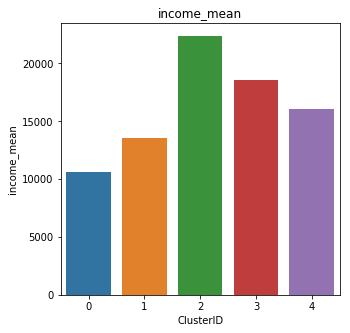

In [265]:
plt.figure(figsize=(5,5))
plt.title("income_mean")
sns.barplot(country_analysis_df.ClusterID,country_analysis_df.income_mean)

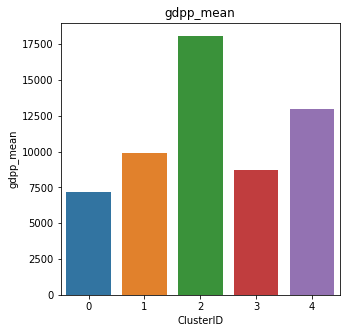

In [266]:
plt.figure(figsize=(5,5))
plt.title("gdpp_mean")
sns.barplot(country_analysis_df.ClusterID,country_analysis_df.gdpp_mean)

As per the above graph, the countries in cluster 1 has high child mortality rate, low income and low gdpp

In [267]:
#Binning cluster 1
cluster_0 = country_analysis[country_analysis['ClusterID']==0]
cluster_0 = cluster_0.sort_values(['gdpp','income','child_mort'],ascending=[True,True,False])
cluster_0

,country,ClusterID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
88,Liberia,0,89.3,62.457,38.5860,302.802,700,5.470,60.8,5.02,327
31,Central African Republic,0,149.0,52.628,17.7508,118.190,888,2.010,47.5,5.21,446
0,Afghanistan,0,90.2,55.300,41.9174,248.297,1610,9.440,56.2,5.82,553
36,Comoros,0,88.2,126.885,34.6819,397.573,1410,3.870,65.9,4.75,769
83,Kyrgyz Republic,0,29.6,454.080,54.3840,718.960,2790,10.000,68.5,3.10,880
87,Lesotho,0,99.7,460.980,129.8700,1181.700,2380,4.150,46.5,3.30,1170
99,Mauritania,0,97.4,608.400,52.9200,734.400,3320,18.900,68.2,4.98,1200
59,Ghana,0,74.7,386.450,68.3820,601.290,3060,16.600,62.2,4.27,1310
105,Morocco,0,33.5,911.260,147.1600,1216.900,6440,0.976,73.5,2.58,2830
62,Guatemala,0,35.4,730.140,193.8550,1027.290,6710,5.140,71.3,3.38,2830


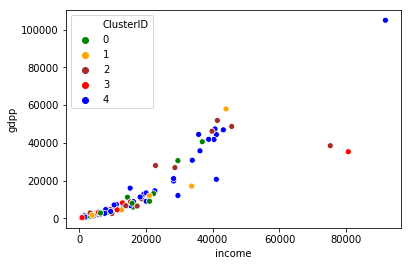

In [268]:
# scatterplot for income,gdpp for different cluster ids
sns.scatterplot(x='income',y='gdpp',hue='ClusterID',legend='full',data=country_analysis,palette=['green','orange','brown','red','blue'])

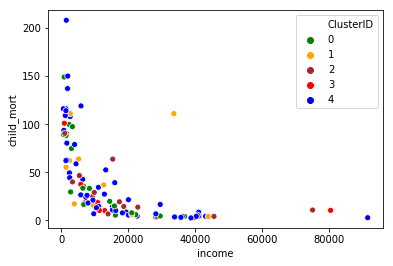

In [269]:
# scatterplot for income,gdpp for different cluster ids
sns.scatterplot(x='income',y='child_mort',hue='ClusterID',legend='full',data=country_analysis,palette=['green','orange','brown','red','blue'])

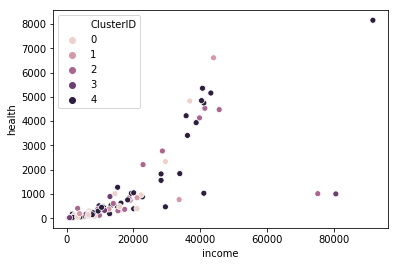

In [290]:
# scatterplot for income,gdpp for different cluster ids
sns.scatterplot(x='income',y='health',hue='ClusterID',legend='full',data=country_analysis)

#### Hierarchial Clustering

In [271]:
df_hierarchy = df_final


In [272]:
df_hierarchy.head()

,PC1,PC2,PC3,PC4
0,-2.636647,1.472085,-0.546500,0.237267
1,-0.459260,-0.678794,0.967852,-0.176389
2,0.648777,-1.026498,-0.244170,-0.267513
3,-0.334274,-1.279033,0.190772,-0.501435
4,3.818137,0.262614,-0.297336,0.974405


In [273]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import linkage

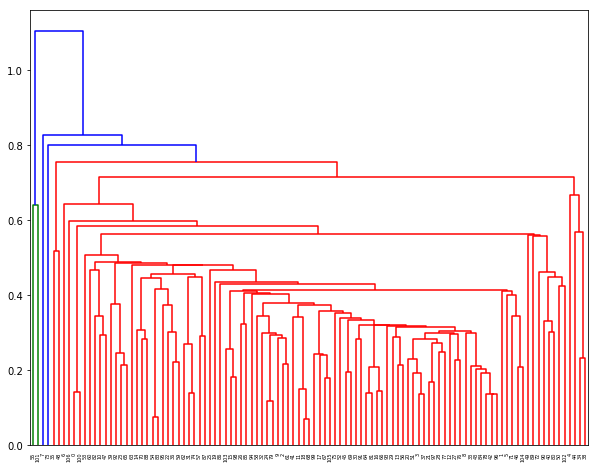

In [274]:
plt.figure(figsize=(10,8))
mergings = linkage(df_hierarchy,method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

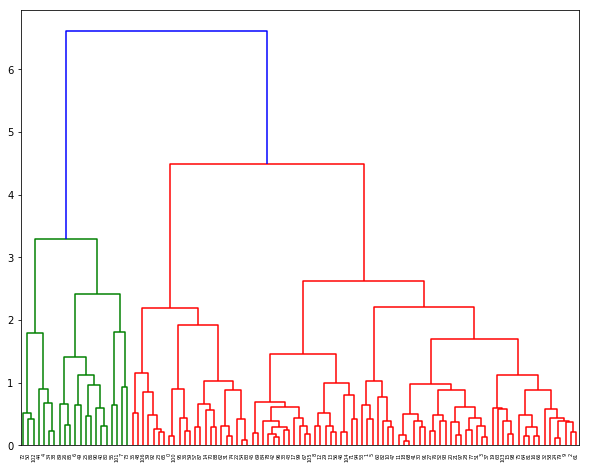

In [275]:
plt.figure(figsize=(10,8))
mergings = linkage(df_hierarchy,method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

In [276]:
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 4).reshape(-1,))

In [277]:
country_analysis_hc = country_analysis.drop(['ClusterID'],axis=1)
country_analysis_hc.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [278]:
country_hierarhial_df = pd.concat([country_analysis_hc,clusterCut],axis=1)
country_hierarhial_df.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','ClusterID']
country_hierarhial_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2


In [279]:
country_hierarhial_df['ClusterID'].value_counts()

1    63
0    23
3    14
2     7
Name: ClusterID, dtype: int64

In [280]:
#Analysing clusters
gdpp_mean_hc = pd.DataFrame(country_hierarhial_df.groupby(["ClusterID"]).gdpp.mean())
child_mort_mean_hc = pd.DataFrame(country_hierarhial_df.groupby(["ClusterID"]).child_mort.mean())
income_mean_hc = pd.DataFrame(country_hierarhial_df.groupby(["ClusterID"]).income.mean())

In [281]:
country_hierarhial_df1 = pd.concat([pd.Series([0,1,2,3]),child_mort_mean_hc,income_mean_hc,gdpp_mean_hc], axis=1)

In [282]:
country_hierarhial_df1.head()

,0,child_mort,income,gdpp
0,0,42.191304,12994.173913,7851.913043
1,1,39.839683,17001.888889,13469.873016
2,2,29.042857,13692.857143,12016.000000
3,3,47.528571,17064.571429,12841.642857


In [283]:
country_hierarhial_df1.columns = ["ClusterID","child_mort_mean_hc","income_mean_hc","gdpp_mean_hc"]

In [284]:
country_hierarhial_df1.head()

,ClusterID,child_mort_mean_hc,income_mean_hc,gdpp_mean_hc
0,0,42.191304,12994.173913,7851.913043
1,1,39.839683,17001.888889,13469.873016
2,2,29.042857,13692.857143,12016.000000
3,3,47.528571,17064.571429,12841.642857


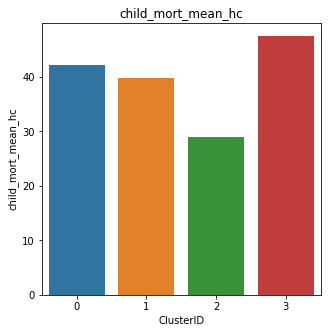

In [285]:
plt.figure(figsize=(5,5))
plt.title("child_mort_mean_hc")
sns.barplot(country_hierarhial_df1.ClusterID,country_hierarhial_df1.child_mort_mean_hc)

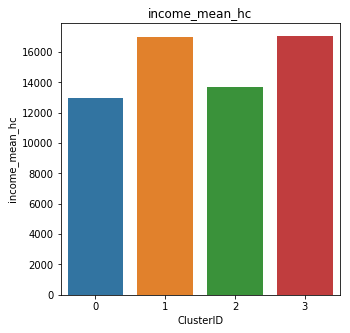

In [286]:
plt.figure(figsize=(5,5))
plt.title("income_mean_hc")
sns.barplot(country_hierarhial_df1.ClusterID,country_hierarhial_df1.income_mean_hc)

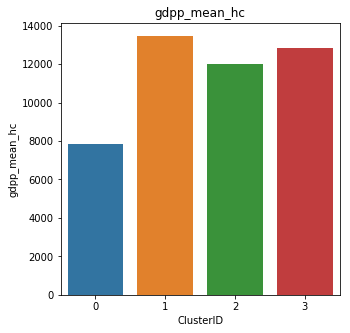

In [287]:
plt.figure(figsize=(5,5))
plt.title("gdpp_mean_hc")
sns.barplot(country_hierarhial_df1.ClusterID,country_hierarhial_df1.gdpp_mean_hc)

As per the above graphs cluster 0 has high child mortality rate, low income and low gdpp

In [288]:
#Binning cluster 0
cluster_0 = country_hierarhial_df[country_hierarhial_df['ClusterID']==0]
cluster_0 = cluster_0.sort_values(['gdpp','income','child_mort'],ascending=[True,True,False])
cluster_0.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
88,Liberia,89.3,62.457,38.5860,302.802,700,5.47,60.8,5.02,327,0
106,Mozambique,101.0,131.985,21.8299,193.578,918,7.64,54.5,5.56,419,0
31,Central African Republic,149.0,52.628,17.7508,118.190,888,2.01,47.5,5.21,446,0
0,Afghanistan,90.2,55.300,41.9174,248.297,1610,9.44,56.2,5.82,553,0
36,Comoros,88.2,126.885,34.6819,397.573,1410,3.87,65.9,4.75,769,0
83,Kyrgyz Republic,29.6,454.080,54.3840,718.960,2790,10.00,68.5,3.10,880,0
87,Lesotho,99.7,460.980,129.8700,1181.700,2380,4.15,46.5,3.30,1170,0
59,Ghana,74.7,386.450,68.3820,601.290,3060,16.60,62.2,4.27,1310,0
62,Guatemala,35.4,730.140,193.8550,1027.290,6710,5.14,71.3,3.38,2830,0
57,Georgia,16.5,1036.000,298.9600,1562.880,6730,8.55,72.8,1.92,2960,0
